# Analyze OpenMM Simulation

In [14]:
experiment_name = 'example_1AKI_1'

This notebook allows you to run an OpenMM simulation locally or on a job submission cluster, like Wynton.

You may run this notebook top-to-bottom, except where you see cells titled **OPTION**. These indicate places you may choose to run certain code (e.g. running a simulation in the jupyter notebook vs on a cluster).

Always specify the experiment name above before skipping down to a section.

# View Trajectory

Already ran a sim, and just want to do the analysis?

No need to run the rest of the notebook. Just specify the experiment name at the top before moving on.

In [ ]:
from pathlib import Path
sim_dir = Path('experiments') / experiment_name / 'simulations'

sim_parameters_file = sim_dir / 'simulation_dict.json'

from easyMD.utils import read_sim_parameters
minimization_steps, \
equilibration_steps,\
production_steps,   \
reporting_interval, \
checkpoint_interval,\
input_pdb_file,     \
sim_dir,            \
processed_dir,      \
experiment_name,    \
forcefield_files,   \
step_size,          \
temperature,        \
only_production      =  read_sim_parameters(sim_parameters_file)

In [13]:
#show the trajectory from PDB with nglview
from easyMD.utils import show_traj
from pathlib import Path

traj_topology_file = processed_dir / input_pdb_file
traj_file = sim_dir / (Path(input_pdb_file).stem + '_prod.dcd')

show_traj(traj_topology_file, traj_file, size=(600, 600))

NGLWidget(max_frame=4)

# Analysis

Text(0, 0.5, 'Distance (Angstroms)')

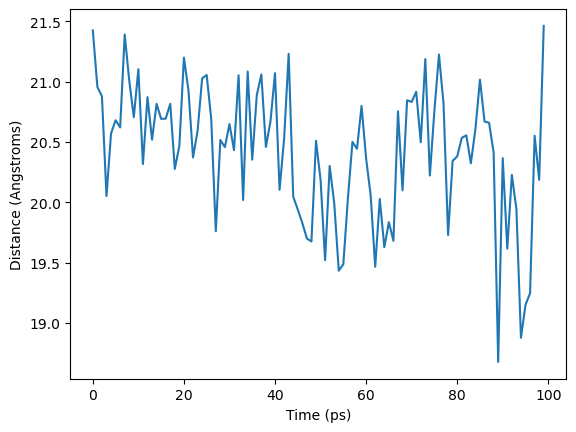

In [12]:
#plot distance between two residues over time:
residue_idx_1 = 1
residue_idx_2 = 120
#get atom indices for the alpha carbons of the residues:
atom_pair = [traj_no_water.topology.select('resid ' + str(residue_idx_1) + ' and name CA')[0], traj_no_water.topology.select('resid ' + str(residue_idx_2) + ' and name CA')[0]]
plt.plot(traj_no_water.time, md.compute_distances(traj_no_water, atom_pairs=[atom_pair])*10) #*10 to convert to angstroms
plt.xlabel('Time (ps)')
plt.ylabel('Distance (Angstroms)')

In [13]:
#show distance between two residues over time with nglview:
view = nv.show_mdtraj(traj_no_water)
view.add_representation('cartoon', selection="all and not water")
view.add_distance(atom_pair=[atom_pair], label_color="black", label=True, color='yellow', label_size=7.5)
view

NGLWidget(max_frame=99)

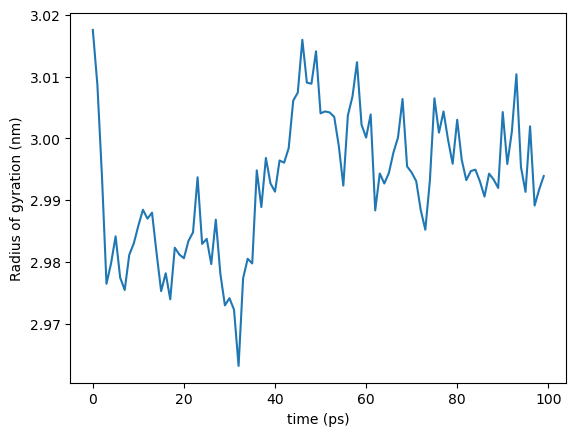

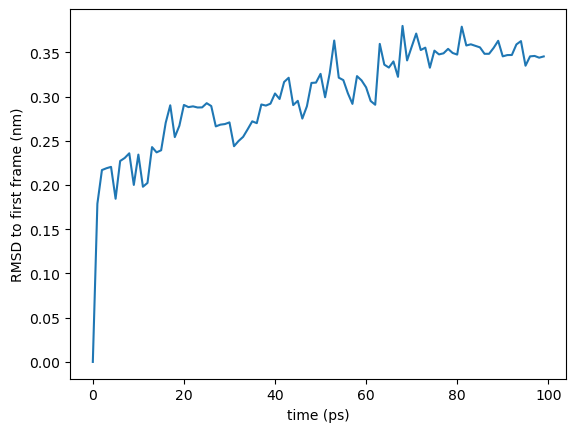

In [14]:
# Radius of gyration over time:
rgyr = md.compute_rg(centered_traj)

# RMSD to the first frame over time:
rmsd_to_first = md.rmsd(traj_no_water, traj_no_water, 0)

# plot them:
plt.plot(traj_no_water.time, rgyr)
plt.xlabel('time (ps)')
plt.ylabel('Radius of gyration (nm)')
plt.show()

plt.plot(traj_no_water.time,  rmsd_to_first, )
plt.xlabel('time (ps)')
plt.ylabel('RMSD to first frame (nm)')
plt.show()



In [15]:
# Solvent accessible surface area all residues, using shrake_rupley:
# sasa is a numpy array of shape (n_frames, n_atoms)
sasa = md.shrake_rupley(traj_no_water, probe_radius=0.14, mode='residue')

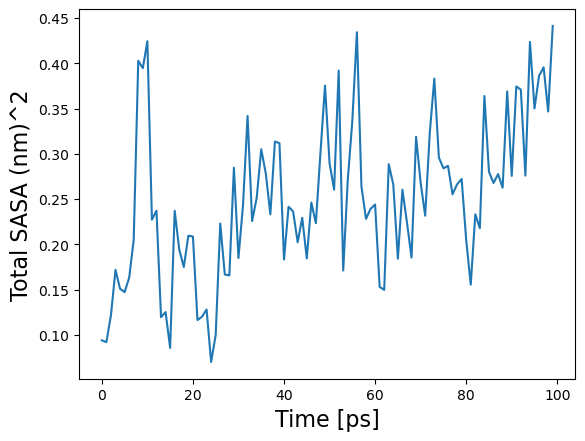

In [16]:
#What's the SASA of residue 108 (TRP)?
residue_idx = 108 #in 1-indexed notation

plt.plot(traj_no_water.time, sasa[:, residue_idx-1])
plt.xlabel('Time [ps]', size=16)
plt.ylabel('Total SASA (nm)^2', size=16)
plt.show()


In [17]:
#show traj with NGLview, highlighting TRP108:
view = nv.show_mdtraj(traj_no_water)
view.add_representation('surface', selection="all")
view.add_representation('surface', selection=str(residue_idx), color='blue')
view

NGLWidget(max_frame=99)